In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

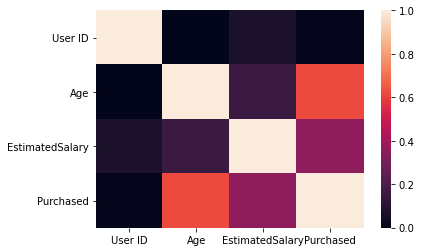

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [7]:
#lets drop the id columns as it is unnecessary 

In [8]:
df=df.drop(['User ID'],axis=1)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


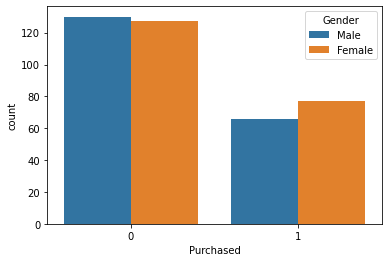

In [10]:
sns.countplot(x=df['Purchased'],hue='Gender',data=df)

In [11]:
#females purchased more than males

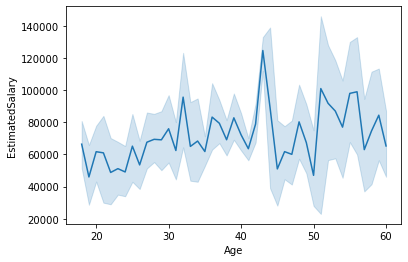

In [12]:
sns.lineplot(x=df['Age'],y=df['EstimatedSalary'],data=df)

In [13]:
#from this figure we can conclude that salary slightly increases with increase in age

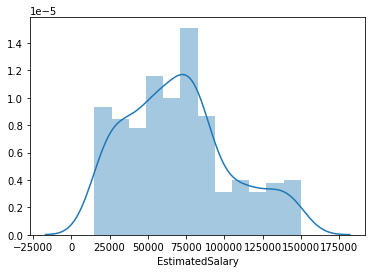

In [14]:
sns.distplot(df['EstimatedSalary'])

In [15]:
#now preprocess categorical features i

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [17]:
y=df['Purchased']
x=df.drop(['Purchased'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [20]:
score_1

0.725

In [21]:
list_scores.append(score_1)
list_models.append('logistic regression')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_s=knn.predict(x_test)
    scores=accuracy_score(y_test,pred_s)
    list_1.append(scores)

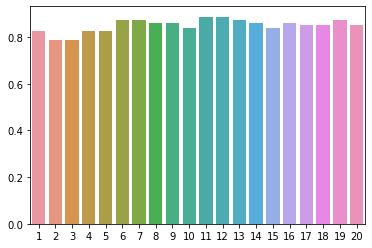

In [23]:
sns.barplot(x=list(range(1,21)),y=list_1)

In [24]:
print(max(list_1))

0.8875


In [25]:
list_scores.append(max(list_1))
list_models.append('kneighbors classifier')


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [27]:
score_2

0.925

In [28]:
list_scores.append(score_2)
list_models.append('random forest classifier')

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
pred_3=gbr.predict(x_test)
score_3=accuracy_score(y_test,pred_3)

In [30]:
score_3

0.925

In [31]:
list_scores.append(score_3)
list_models.append('gradient boosting classifier')

<BarContainer object of 4 artists>

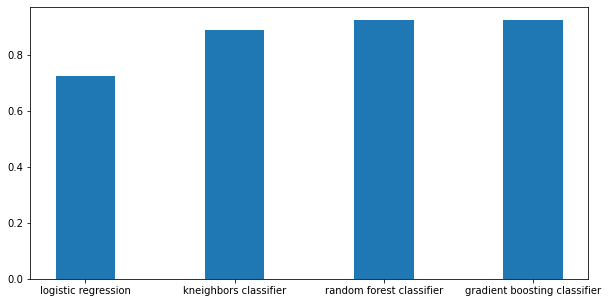

In [32]:
plt.figure(figsize=(10,5))
plt.bar(list_models,list_scores,width=0.4)

In [33]:
#from the above figure we can conclude that random forest gives the best accuracy score